# This part of Jupyter notebook contains information relaited to data processing

Content of differen fuctions are:
1. Reading twitter data export from mongoDB as pandas dataframe
2. Adding filed with twitter Turncated parameter
    1. to have combined tweet text
    2. to have combine hashtags
    3. to have suitable timestamp for pandas dataframe
3. tweet text processing to have only generic letters without links, punctiatoin etc.

In [30]:
def file_to_dataframe(twitterData):
    import pandas as pd
    df = pd.read_csv(twitterData,low_memory=False)
    return df

In [147]:
df = file_to_dataframe(filename)

In [32]:
def format_twitter_timestamp(df):
    from datetime import datetime
    for index, row in df.iterrows():
        #Get data timestamp
        dtime = df.loc[index,'created_at']
        #format Twitter format timestamp
        new_datetime = datetime.strftime(datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
        df.loc[index,'datetime']= new_datetime

In [33]:
format_twitter_timestamp(df)

In [34]:
def format_combined_columns(df):
    #combine tweet_text and extended_tweet.full_text with rule that truncated state
    for index, row in df.iterrows():
        truncate = df.loc[index,'truncated']
        if truncate == False:
            #print(df.loc[index,'text'])
            df.loc[index,'combine_text'] = df.loc[index,'text']
            df.loc[index,'combine_hastags'] = df.loc[index,'entities.hashtags']
        else:
            #print(df.loc[index,'extended_tweet.full_text'])
            df.loc[index,'combine_text'] = df.loc[index,'extended_tweet.full_text']
            df.loc[index,'combine_hastags'] = df.loc[index,'extended_tweet.entities.hashtags']

In [35]:
format_combined_columns(df)

In [36]:
def filter_dataframe_between_dates(df,start_date,end_date,save=False,filename=None):

    #get indexes after start date
    after_start_date = df["datetime"] >= start_date

    #get indexes before end date
    before_end_date = df["datetime"] <= end_date

    #get indexes between dateframe
    between_two_dates = after_start_date & before_end_date

    #Filter tweets with dateframe
    filtered_dates = df.loc[between_two_dates]

    #save data set to csv file
    if save == True:
        filtered_dates.to_csv(filename)
    return filtered_dates

In [37]:
#Parameters "dataframe" , "starttime", "endtime", "save to file? True:False", "filename" required: dataframe, starttime, endtime
df=filter_dataframe_between_dates(df,"2020-06-23","2021-03-23")

In [148]:
#Select only required columns
df_sep= df[['combine_text','combine_hastags']]

In [149]:
def tweet_text_processing(df):
    import re
    df['combine_text_pr'] = df['combine_text'].str.lower()
    df['combine_text_pr'] = \
    df['combine_text_pr'].map(lambda x: re.sub(r'http\S+', '', x)) #remove links
    df['combine_text_pr'] = \
    df['combine_text_pr'].map(lambda x: re.sub(r"\\[a-z][a-z]?[0-9]+", '', x)) #remove special characters
    df['combine_text_pr'] = \
    df['combine_text_pr'].map(lambda x: x.replace('\n', ' ')) #remove line breaks
    df['combine_text_pr'] = \
    df['combine_text_pr'].map(lambda x: x.replace(',', ' ')) #replace dot with space
    df['combine_text_pr'] = \
    df['combine_text_pr'].map(lambda x: re.sub('[^A-Za-z äÄöÖåÅ]+', '', x)) #include only letters and also nordic letters 'ÄÖÅ'

In [150]:
tweet_text_processing(df_sep)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [151]:
df_sep

,combine_text,combine_hastags,combine_text_pr
0,@bobakenyel Cariin huhu,[],bobakenyel cariin huhu
1,@siamjink cariin huhu,[],siamjink cariin huhu
2,Binisita ni coachflex si kyle huhu,[],binisita ni coachflex si kyle huhu
3,RT @petterij: Tällaista roskaa saa levittää ke...,[],rt petterij tällaista roskaa saa levittää kene...
4,clyden huhu💗,[],clyden huhu
...,...,...,...
43540,@Xylospongiumi @KaisaKallatsa @TuominenVesa @M...,[],xylospongiumi kaisakallatsa tuominenvesa marin...
43541,@MarinSanna @KristaKiuru Yläkoulujen #etäkoulu...,"[{""text"":""etäkoulu"",""indices"":[37,46]},{""text""...",marinsanna kristakiuru yläkoulujen etäkoulu on...
43542,Huhu. Brianna! ❤️,[],huhu brianna
43543,RT @TinNguy93150538: Đk con cu ko à. Huhu http...,[],rt tinnguy k con cu ko huhu


In [152]:
def filter_out_words(df,words):
    for word in words:
        df = df[~df['combine_text_pr'].str.contains(word, na=False)]
    return df

In [153]:
words=['huhu'] #list of exluded words
df_filtered=filter_out_words(df_sep,words)

In [154]:
df_filtered

,combine_text,combine_hastags,combine_text_pr
3,RT @petterij: Tällaista roskaa saa levittää ke...,[],rt petterij tällaista roskaa saa levittää kene...
23,Tiistait ovat nykyään omistettu #misinformaati...,"[{""text"":""misinformaatio"",""indices"":[32,47]},{...",tiistait ovat nykyään omistettu misinformaatio...
26,"RT @pisotalus: On käsittämätöntä, jos Suomessa...",[],rt pisotalus on käsittämätöntä jos suomessa m...
28,Vapaa media:\n\nhttps://t.co/rTYsuiW2eU\n\nhtt...,[],vapaa media
29,Tämä jo toinen valeuutinen ei toimi suomessa.M...,[],tämä jo toinen valeuutinen ei toimi suomessame...
...,...,...,...
43537,"@domekarukoski Vaarallisempaa on kyllä uskoa, ...",[],domekarukoski vaarallisempaa on kyllä uskoa e...
43538,RT @HuuhtanenPanu: Hei #valtamedia 🙂\n\nKatsok...,"[{""text"":""valtamedia"",""indices"":[23,34]},{""tex...",rt huuhtanenpanu hei valtamedia katsokaapa t...
43539,RT @HuuhtanenPanu: Hei #valtamedia 🙂\n\nKatsok...,"[{""text"":""valtamedia"",""indices"":[23,34]},{""tex...",rt huuhtanenpanu hei valtamedia katsokaapa t...
43540,@Xylospongiumi @KaisaKallatsa @TuominenVesa @M...,[],xylospongiumi kaisakallatsa tuominenvesa marin...


# This part of Jupyter notebook contains information relaited to data visualization and analysis

Content of differen fuctions are:
1. Formating stopword list from local path or URL source
2. Making a wordcloud exluding stopwords
3. Making a wordlist excluding stopwords
4. Listing most commonly used words in the tweets
5. making corpus for the word list data
6. Lda modeling for the given number of topics
7. lda model topics as a list of topics with number of words
8. Lda model visualization with pyLDAvis library, saving resault in the local path.

In [155]:
#file from https://raw.githubusercontent.com/stopwords-iso/stopwords-fi/master/stopwords-fi.txt   
def list_stopwords(filename=None,online=True, URL="https://raw.githubusercontent.com/stopwords-iso/stopwords-fi/master/stopwords-fi.txt"):
    stopword_list=[]
    if online == True:
        import requests
        response = requests.get(URL)
        a_file = response.text
    #a_file = urllib.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-fi/master/stopwords-fi.txt").read()
    #a_file = urllib2.urlopen("https://raw.githubusercontent.com/stopwords-iso/stopwords-fi/master/stopwords-fi.txt") # it's a file like object and works just like a file
    #a_file = open("stopwords-fi.txt", "r",encoding='utf8')
    #list_of_lists = [(line.strip()).split() for line in a_file]
    #a_file.close()
        stopword_list=a_file.strip().split()
    else:
        a_file = open(filename, "r",encoding='utf8')
        list_of_lists = [(line.strip()).split() for line in a_file]
        a_file.close()
        for elem in list_of_lists:
            for item in elem:
                stopword_list.append(item)
    return stopword_list

In [156]:
#Option to list items from online or use stopword list text file, Default url is set to finnish stopwords
stopwords = list_stopwords()

In [157]:
def make_wordcloud(df,stopwords,background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',width=1920, height=1080,collocations = False,save_toimg=False,filename=None):
    # Import the wordcloud library
    import re
    from wordcloud import WordCloud
    # Join the different processed titles together.
    long_string = ','.join(list(df['combine_text_pr'].values))

    # Create a WordCloud object
    stop_words = ["https", "co", "RT", "tco", "rt"] + list(stopwords)
    wordcloud = WordCloud(stopwords=stop_words,background_color=background_color, max_words=max_words, contour_width=contour_width, contour_color=contour_color,width=width, height=height,collocations = collocations)
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    if save_toimg == True:
        wordcloud.to_file(filename)
    #wordcloud.to_image()
    return wordcloud

In [158]:
pic1=make_wordcloud(df_filtered,stopwords,filename="test.png",save_toimg=True)

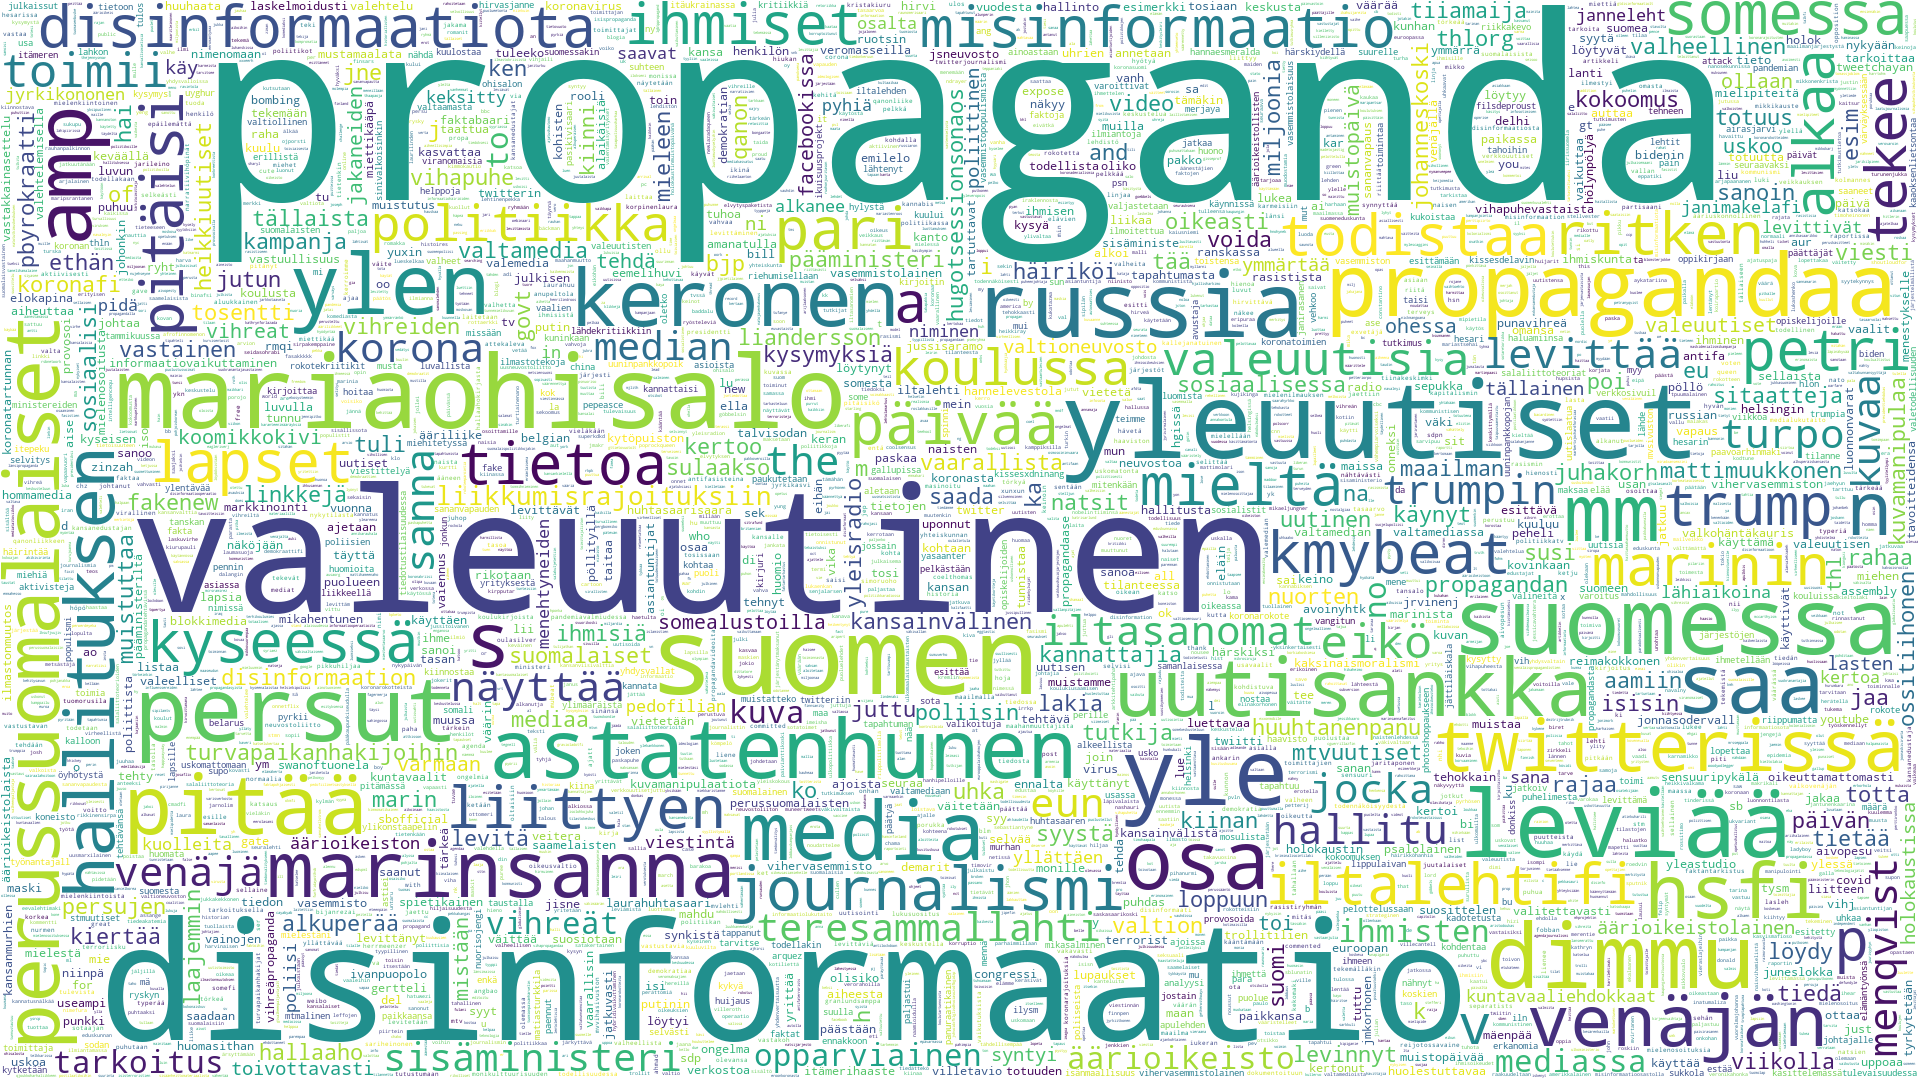

In [159]:
pic1.to_image()

In [168]:
def make_word_list(df,stopwords):
    import gensim
    from gensim.utils import simple_preprocess
    #import nltk
    #nltk.download('stopwords')
    #from nltk.corpus import stopwords

    stop_words = list(stopwords)
    stop_words.extend(["https", "co", "RT", "tco", "rt"])
    def sent_to_words(sentences):
        for sentence in sentences:
            # deacc=True removes punctuations
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) 
                 if word not in stop_words] for doc in texts]

    data = df.combine_text_pr.values.tolist()
    data_words = list(sent_to_words(data))
    # remove stop words
    data_words = remove_stopwords(data_words)
    return data_words,data

In [169]:
data_words,data = make_word_list(df_filtered,stopwords)

In [171]:
import numpy
from collections import Counter
words=numpy.concatenate( data_words, axis=0 )
counter_obj = Counter(words)
counter_obj
counter_obj.most_common(n=50)

[('propaganda', 4804),
 ('valeuutinen', 1676),
 ('disinformaatio', 1500),
 ('suomen', 492),
 ('yleuutiset', 461),
 ('mariaohisalo', 421),
 ('leviää', 358),
 ('suomessa', 354),
 ('yle', 354),
 ('russia', 334),
 ('dimmu', 328),
 ('persut', 326),
 ('propagandaa', 306),
 ('ylen', 287),
 ('saa', 275),
 ('osa', 268),
 ('media', 267),
 ('astatenhunen', 267),
 ('pitää', 266),
 ('mm', 255),
 ('uutisankka', 253),
 ('keronen', 249),
 ('amp', 248),
 ('marinsanna', 244),
 ('hsfi', 225),
 ('twitterissä', 217),
 ('venäjän', 216),
 ('hallituksen', 206),
 ('journalismi', 205),
 ('somessa', 197),
 ('pitäisi', 196),
 ('tietoa', 192),
 ('kmybeat', 192),
 ('ritken', 190),
 ('pari', 189),
 ('päivää', 186),
 ('liittyen', 185),
 ('lapset', 180),
 ('trump', 179),
 ('mieltä', 178),
 ('ihmiset', 177),
 ('petri', 174),
 ('kyseessä', 172),
 ('misinformaatio', 171),
 ('todistaa', 168),
 ('marinin', 166),
 ('iltalehtifi', 165),
 ('tekee', 163),
 ('alkaa', 163),
 ('politiikka', 161)]

In [172]:
def number_of_common_words(n=30):
    import pandas as pd
    items=counter_obj.most_common(n)
    df = pd.DataFrame(items,columns =['word', 'freq'])
    return df

In [173]:
number_of_common_words(30)

,word,freq
0,propaganda,4804
1,valeuutinen,1676
2,disinformaatio,1500
3,suomen,492
4,yleuutiset,461
5,mariaohisalo,421
6,leviää,358
7,suomessa,354
8,yle,354
9,russia,334


In [182]:
def make_corpus(data): 
    import gensim.corpora as corpora
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    return corpus,id2word

In [196]:
def lda_modeling(topics=15):
    from pprint import pprint
    corpus, id2word=make_corpus(data_words)
    # number of topics
    num_topics = topics
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
    # Print the Keyword in the x topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    return lda_model

In [199]:
def lda_model_list_of_words(lda_model,words):
    import pandas as pd
    array2=[]
    array=[]
    dataframe_obj={}
    for idx, topic in lda_model.show_topics(formatted=False,num_topics=15, num_words=words):
        array=[]
        print("Topic: {} \nWords: {}".format(idx, [w[0] for w in topic]))
        print("\n")
        for w in topic:
            array.append(w[0])
        topic = "topic" + str(idx+1)
        dataframe_obj[topic] = array

    df3 = pd.DataFrame(dataframe_obj)
    return df3

In [200]:
lda_model_list_of_words(lda_modeling(topics=15),20)

[(0,
  '0.020*"propaganda" + 0.006*"valeuutinen" + 0.005*"disinformaatio" + '
  '0.003*"juhop" + 0.003*"aiheesta" + 0.003*"tuli" + 0.003*"raportissa" + '
  '0.002*"riippumatta" + 0.002*"faktabaari" + 0.002*"puhdas"'),
 (1,
  '0.022*"propaganda" + 0.008*"valeuutinen" + 0.006*"disinformaatio" + '
  '0.005*"astatenhunen" + 0.003*"euroopan" + 0.003*"viranomaisia" + '
  '0.003*"koronasta" + 0.003*"huuhaata" + 0.003*"maissa" + 0.003*"masinoitu"'),
 (2,
  '0.018*"propaganda" + 0.018*"disinformaatio" + 0.009*"pari" + 0.009*"päivää" '
  '+ 0.009*"syystä" + 0.009*"liandersson" + 0.009*"vaarallista" + '
  '0.008*"levinnyt" + 0.008*"kuvamanipulaa" + 0.008*"valheellinen"'),
 (3,
  '0.030*"propaganda" + 0.008*"disinformaatio" + 0.004*"menqvist" + '
  '0.003*"suomen" + 0.003*"twitterissä" + 0.003*"mattimuukkonen" + '
  '0.002*"itäukrainassa" + 0.002*"miehitetyssä" + 0.002*"sanoin" + '
  '0.002*"yleuutiset"'),
 (4,
  '0.014*"propaganda" + 0.013*"mariaohisalo" + 0.011*"valeuutisia" + '
  '0.011*"somess

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
0,propaganda,propaganda,propaganda,propaganda,propaganda,propaganda,propaganda,valeuutinen,propaganda,propaganda,propaganda,propaganda,propaganda,propaganda,disinformaatio
1,valeuutinen,valeuutinen,disinformaatio,disinformaatio,mariaohisalo,valeuutinen,disinformaatio,propaganda,valeuutinen,valeuutinen,valeuutinen,hai,valeuutinen,valeuutinen,valeuutinen
2,disinformaatio,disinformaatio,pari,menqvist,valeuutisia,disinformaatio,valeuutinen,leviää,russia,leviää,ylen,govt,disinformaatio,hallituksen,propaganda
3,juhop,astatenhunen,päivää,suomen,somessa,ritken,leviää,mariaohisalo,mattimuukkonen,mariaohisalo,somessa,disinformaatio,persut,kysymyksiä,leviää
4,aiheesta,euroopan,syystä,twitterissä,jaa,yle,kysymyksiä,opparviainen,dimmu,liittyen,mariaohisalo,bjp,marinsanna,keronen,mariaohisalo
5,tuli,viranomaisia,liandersson,mattimuukkonen,todistaa,persut,mariaohisalo,liittyen,vaiennus,disinformaatio,valeuutisia,ka,kuvaa,sanna,ken
6,raportissa,koronasta,vaarallista,itäukrainassa,sitaatteja,russia,persut,sisäministeri,twitterissä,opparviainen,disinformaatio,mein,leviää,radio,levinnyt
7,riippumatta,huuhaata,levinnyt,miehitetyssä,linkkejä,journalismi,teresammallahti,sosiaalisi,mieltä,sosiaalisi,alkuperää,aise,toimii,valikoituja,päivää
8,faktabaari,maissa,kuvamanipulaa,sanoin,ethän,propagandaa,ku,ritken,tiiamaija,sisäministeri,todistaa,delhi,jakaneiden,ennakkoon,liandersson
9,puhdas,masinoitu,valheellinen,yleuutiset,alkuperää,suomessa,sisäministeri,yleuutiset,viikolla,kannattajia,jaa,raha,somealustoilla,nuorten,vaarallista


In [205]:
def lda_viz_pyldavis(lda_model, num_topics):
    import gensim
    import pyLDAvis.gensim_models
    import pickle 
    import pyLDAvis
    import os
    corpus, id2word=make_corpus(data_words)
    # Visualize the topics
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
    #import pyLDAvis.gensim
    import pyLDAvis.gensim_models as gensimvis

    #pyLDAvis.gensim.prepare(lda, corpus, dictionary)
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yoursele

    if 1 == 1:
        LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
    
    return LDAvis_prepared


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
lda_viz_pyldavis(lda_modeling(topics=15),15)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.022*"propaganda" + 0.006*"valeuutinen" + 0.004*"disinformaatio" + '
  '0.002*"keronen" + 0.002*"tosentti" + 0.002*"dimmu" + 0.002*"kissesxdninang" '
  '+ 0.002*"ymmärtää" + 0.002*"nuorten" + 0.002*"kissesdelavin"'),
 (1,
  '0.024*"propaganda" + 0.010*"disinformaatio" + 0.004*"valeuutinen" + '
  '0.003*"ylen" + 0.003*"media" + 0.003*"hsfi" + 0.002*"bombings" + '
  '0.002*"rmqi" + 0.002*"huolestuttavaa" + 0.002*"uutisankka"'),
 (2,
  '0.028*"propaganda" + 0.006*"valeuutinen" + 0.005*"suomen" + '
  '0.004*"disinformaatio" + 0.003*"media" + 0.003*"yleuutiset" + '
  '0.003*"koomikkokivi" + 0.002*"turpo" + 0.002*"loppuun" + '
  '0.002*"propagandaa"'),
 (3,
  '0.025*"propaganda" + 0.013*"valeuutinen" + 0.009*"disinformaatio" + '
  '0.004*"levinnyt" + 0.004*"yleuutiset" + 0.004*"syystä" + '
  '0.004*"hallituksen" + 0.004*"liandersson" + 0.004*"päivää" + '
  '0.004*"vaarallista"'),
 (4,
  '0.020*"propaganda" + 0.012*"valeuutinen" + 0.007*"disinformaatio" + '
  '0.005*"mariaohisalo" + 

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.042393  0.001435       1        1  7.884607
11     0.063287 -0.091568       2        1  7.796185
10    -0.071745 -0.013137       3        1  7.641539
7     -0.136167 -0.025057       4        1  7.494677
1      0.041222 -0.030607       5        1  7.455098
9      0.069025 -0.084797       6        1  7.073823
2      0.064252  0.071049       7        1  6.957096
0      0.059634  0.125083       8        1  6.443978
14    -0.075153 -0.031559       9        1  6.409364
13    -0.024692  0.047050      10        1  6.267770
6      0.069295 -0.078802      11        1  6.006580
4     -0.074617 -0.020517      12        1  5.924621
8     -0.000798  0.077743      13        1  5.637124
5      0.012958  0.025842      14        1  5.609027
12    -0.038894  0.027843      15        1  5.398509, topic_info=                 Term        Freq        Total Category  logprob  loglift
2866           russia  216.000000   216.000000  Default  30.0000  30.0000
40191            govt  186.000000   186.000000  Default  29.0000  29.0000
1178     mariaohisalo  469.000000   469.000000  Default  28.0000  28.0000
691               hai  212.000000   212.000000  Default  27.0000  27.0000
31541        linkkejä  159.000000   159.000000  Default  26.0000  26.0000
...               ...         ...          ...      ...      ...      ...
14           liittyen   33.141149   241.095976  Topic15  -5.6831   0.9346
178    disinformaatio   41.927116  1345.691290  Topic15  -5.4480  -0.5497
32           suomessa   31.871329   293.092391  Topic15  -5.7222   0.7003
191              esim   26.795036   115.360986  Topic15  -5.8957   1.4592
5700       kysymyksiä   25.737265   166.784550  Topic15  -5.9360   1.0503

[1185 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
368       1  0.075176     aamiin
368       2  0.131558     aamiin
368       3  0.075176     aamiin
368       4  0.018794     aamiin
368       6  0.056382     aamiin
...     ...       ...        ...
5210      5  0.045133  öyhötystä
5210     11  0.045133  öyhötystä
5210     12  0.045133  öyhötystä
5210     13  0.045133  öyhötystä
5210     14  0.180532  öyhötystä

[4711 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 12, 11, 8, 2, 10, 3, 1, 15, 14, 7, 5, 9, 6, 13])